# Animated plots

In [2]:
from IPython.display import HTML
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
N = 5
M = 100
points_evo_array = np.random.rand(M,N)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, M), ylim=(0, np.max(points_evo_array)))
lines = []

lines = [ax.plot([], [])[0] for _ in range(N)]

def init():    
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j,line in enumerate(lines):
        line.set_data(range(i), [points_evo_array[:i,j]])
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,np.arange(1, M), init_func=init, interval=10, blit=True)

HTML(anim.to_html5_video())

# Gaussian number gen

In [1]:
import numpy.random

output_file = open("junk.dat", "w")
for i in range(100):
    y = numpy.random.normal(0.0, 1.0)
    output_file.write(str(i)+' '+str(y))

# File I/O

In [4]:
import numpy.random

output_file = open("junk.dat", "w")
for i in range(100):
    y = numpy.random.normal(0.0, 1.0)
    output_file.write(str(i)+' '+str(y))

# Histograms

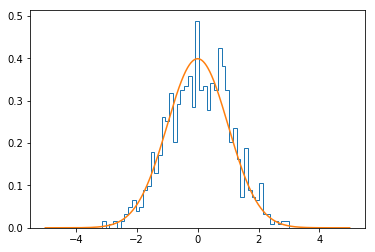

In [5]:
import numpy
import pylab

y_data = []
for i in range(1000):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Command line arguments

In [ ]:
#!/usr/bin/python
import sys
from optparse import OptionParser

# parse command line arguments
usage = "usage: %prog [options] arg"
parser = OptionParser(usage)
parser.add_option("--n", type="int", dest="nn", default=1)
(options, args) = parser.parse_args()

import numpy
import pylab

y_data = []
for i in range(options.nn):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Running other programs

In [6]:
import os
#Run the ls program
os.system("ls")

0

# Molecular dynamics example

This is a toy "spring" particles trapped
in a spring well, using a symplectic
integrator. Great example of python's
power (and its lack of speed). Balance
<em>your</em> programming time against the <em>run
time</em> when choosing scripting or compiled
languages.

In [15]:
import numpy, pylab, math
box_length = 10
N = 20
dt = 0.1
k_particle = 5
diameter = 2.0
k_domain = 0.1
pos = (numpy.random.rand(N, 2) - 0.5) * box_length
vel = numpy.zeros((N,2))

def force(i, j):
    rij = pos[i] - pos[j]
    distance = numpy.linalg.norm(rij)
    if distance > diameter or i == j:
        return numpy.array([0,0])
    rij_norm = rij / distance
    return k_particle * (diameter - distance) * rij_norm

def timestep(step):
    for i in range(N):
        pos[i] += 0.5 * dt * vel[i]

    forces = numpy.zeros((N,2))
    for i in range(N):
        forces[i] += - k_domain * pos[i]
        for j in range(N):
            forces[i] += force(i,j)

    for i in range(N):
        vel[i] += dt * forces[i]
    
    for i in range(N):
        pos[i] += 0.5 * dt * vel[i]
    
    scatter.set_offsets(pos)
    return [scatter]
        
from IPython.display import HTML
from matplotlib import animation
fig = plt.figure()
ax = plt.axes(xlim=(0, M), ylim=(0, np.max(points_evo_array)))
scatter = ax.scatter(pos[:,0], pos[:,1], s=250)
ax.set_xlim(-box_length, +box_length)
ax.set_ylim(-box_length, +box_length)
anim = animation.FuncAnimation(fig, timestep, np.arange(1, 100), interval=10, blit=True)
HTML(anim.to_html5_video())

https://www.scipy-lectures.org/intro/scipy.html#statistics-and-random-numbers-scipy-stats

# Stock market analysis

As an interesting demonstration of the power of some of the libraries of Python, take a look at some stock analysis!

In [10]:
# Pandas is like a programmable spreadsheet, you have named columns of data and an index
import pandas as pd
# This next line is needed to fix a current bug in pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
# Pandas datareader is an interface to lots of kinds of sources of data, including stocks
import pandas_datareader.data as web

# It should be noted that Pandas datareader for stock information breaks all the time,
# all I can promise is that this works today, 6th July 2018
 
# Let's get Tesla stock data; Tesla's ticker symbol is TSLA on the US NASDAQ exchange
# First argument is the series we want, second is the source ("stooq" works at the moment),
# third is the start date, fourth is the end date
tesla = web.DataReader("TSLA.US", "stooq")

# We'll also extract the Standard & Poor 500 index (sum of the top 500 companies)
spx = web.DataReader("^SPX", "stooq")

#What kind of data did we get? Lets print the header of the table and the first few rows
print(tesla.head())

              Open    High     Low   Close      Volume
Date                                                  
2018-07-05  313.76  314.39  296.22  309.16  17476374.0
2018-07-03  331.75  332.49  309.69  310.86  12282638.0
2018-07-02  360.07  364.78  329.85  335.07  18759765.0
2018-06-29  353.33  353.86  342.41  342.95   6492396.0
2018-06-28  348.66  357.02  346.11  349.93   8398005.0


Great, opening and closing prices as well as daily highs/lows and the volume of stocks traded. Let's check the S&P index,

In [11]:
print(spx.head())

               Open     High      Low    Close       Volume
Date                                                       
2018-07-05  2724.19  2737.83  2716.02  2736.61          NaN
2018-07-03  2733.27  2736.58  2711.16  2713.22  336033504.0
2018-07-02  2704.95  2727.26  2698.95  2726.71  499361024.0
2018-06-29  2727.13  2743.26  2718.03  2718.37  685339776.0
2018-06-28  2698.69  2724.34  2691.99  2716.31  539312192.0


OK, so the last working day is a NaN value (Not a number), probably because the aggregate volume data is not available yet. Let's plot the data and compare tesla versus the index,

Populating the interactive namespace from numpy and matplotlib


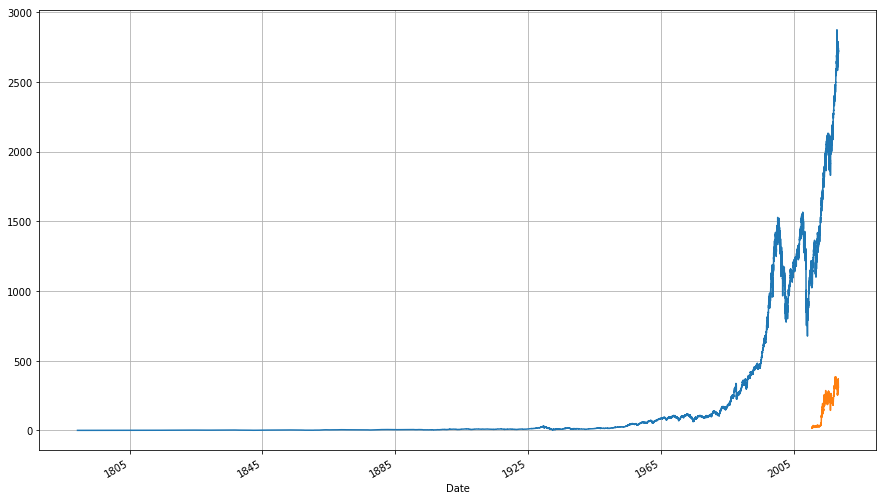

In [12]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

# We will look at stock prices over the past years, starting at January 1, 2016

spx["Close"].plot(grid = True) # Plot the adjusted closing price of AAPL
tesla["Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

Ooopps, the S&P 500 has data back until the 1800s.... Lets filter that data, only taking back as far as the start of 2016

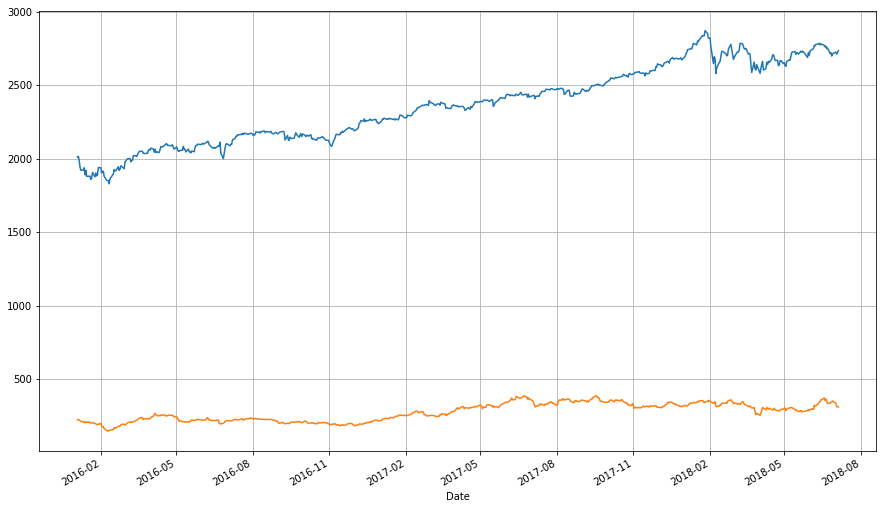

In [32]:
start = datetime.date.today()
end = datetime.datetime(2016,1,1)
spx.loc[start:end]["Close"].plot(grid = True)
tesla.loc[start:end]["Close"].plot(grid = True)

Let's normalise by the price today

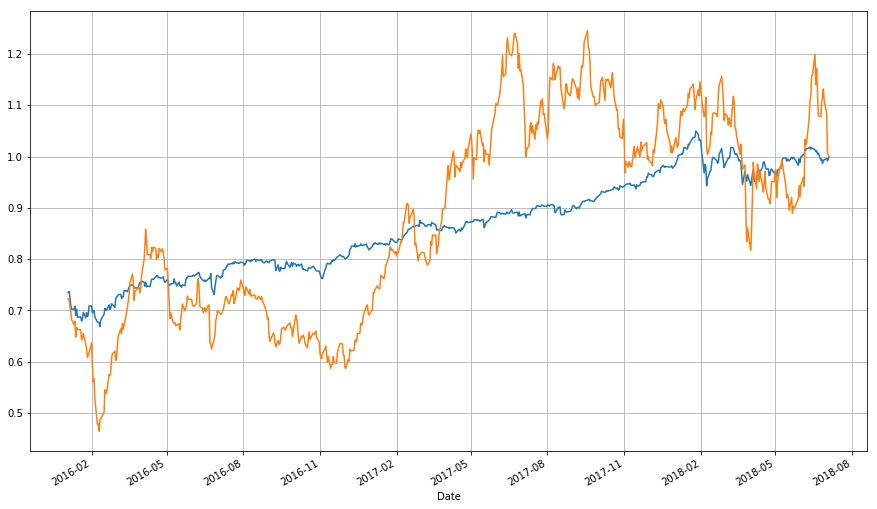

In [39]:
start = datetime.datetime(2018,7,6) #Today
end = datetime.datetime(2016,1,1)
(spx.loc[start:end]["Close"]/spx.iloc[0]["Close"]).plot(grid = True)
(tesla.loc[start:end]["Close"]/tesla.iloc[0]["Close"]).plot(grid = True)

Nice! We can see that over this time period, Tesla actually performed exactly to market average but with significant volatility...

Let's plot tesla's performance relative to the S&P 500 over that time.

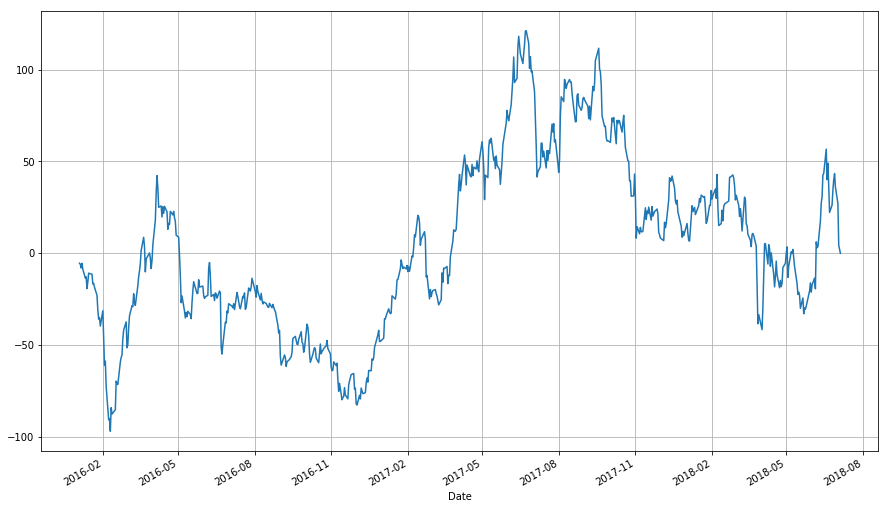

In [69]:
start = datetime.datetime(2018,7,6) #Today
end = datetime.datetime(2016,1,1)
data = tesla.loc[start:end]["Close"]/spx.loc[start:end]["Close"]*spx.iloc[0]["Close"] - tesla.iloc[0]["Close"]
data.plot(grid = True)

Warren Buffet (famous american investor, 3rd wealthiest person in the world), made a  \$1M bet that a low-cost S&P 500 index tracker (simple fund that invests in all the companies in the index) would outperform highly managed index funds over 10 years. He won this bet when the index tracker made 7\% annual and the hedge funds made 2.2\%. 

This is anecdotal evidence that even stocks that have performed amazingly at times (like tesla) still average out to the index.

## Extra credit

For more information on this, see this example:
http://earthpy.org/pandas-basics.html


- What day of the week is the best day to buy Tesla? Just take all data for the week, normalise it by Monday's value, and then plot the average value over the rest of the week.